<a href="https://colab.research.google.com/github/sensei-jirving/Online-DS-PT-01.24.22-cohort-notes/blob/main/Week_03/Lecture_02/CodeAlong/01_24_22_SOLUTION_Multivariate_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate Analysis & Visualizations

Load the [cleaned medical data](https://drive.google.com/file/d/15QvGnjlYvVd8bxl-Fl_EPVgmfvgATGZB/view?usp=sharing) using the url in the cell below: 

In [1]:
## excel file url
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
url ="https://docs.google.com/spreadsheets/d/e/2PACX-1vRUYiMWJ3WI6lrrG8rdRFy49aaKSqtlZhbqHodoJfQeDnWj1bgvdSCVM0tnlTkExjhSv7f0LSfIiTVU/pub?output=xlsx"
df = pd.read_excel(url)
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,Base_charge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53.0,86575.93,Divorced,Male,0.0,19.141466,6.0,0.0,0.0,0.0,Emergency Admission,1.0,0.0,Medium,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,Blood Work,10.585770,3726.702860,17939.40342
1,FL,30.84513,-85.22907,Urban,3.0,51.0,46805.99,Married,Female,0.0,18.940352,4.0,2.0,1.0,0.0,Emergency Admission,1.0,0.0,High,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Intravenous,15.129562,4193.190458,17612.99812
2,SD,43.54321,-96.63772,Suburban,3.0,53.0,14370.14,Widowed,Female,0.0,18.057507,4.0,1.0,0.0,0.0,Elective Admission,1.0,0.0,Medium,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Blood Work,4.772177,2434.234222,17505.19246
3,MN,43.89744,-93.51479,Suburban,0.0,78.0,39741.49,Married,Male,0.0,16.576858,4.0,1.0,0.0,0.0,Elective Admission,0.0,1.0,Medium,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Blood Work,1.714879,2127.830423,12993.43735
4,OK,35.67302,-95.19180,Urban,3.0,76.0,81999.88,Never Married,Male,0.0,19.612646,6.0,0.0,0.0,0.0,Observation Admission,0.0,0.0,Medium,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,Blood Work,5.957250,2636.691180,12742.58991


1) This is a fun place to start!  Make a scatterplot with Lng on the x axis and Lat on the y axis.

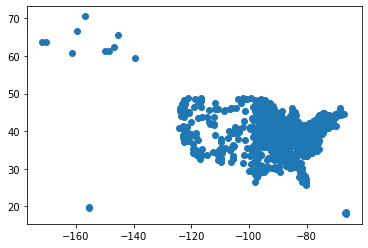

In [2]:
## with matplotlib
plt.scatter(data = df, x= "Lng", y = 'Lat')


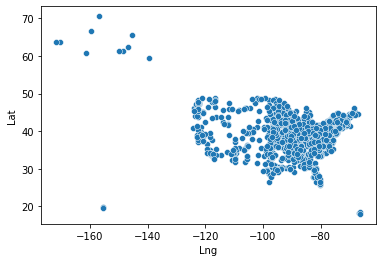

In [3]:
# with seaborn 
sns.scatterplot(data=df,x= "Lng", y = 'Lat')

2a) Make a scatterplot that shows the Base_charge vs. Initial_days


Is there a relationship between Base_charge and Initial_days?

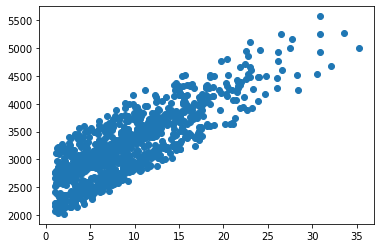

In [4]:
# matplotlib 
plt.scatter(data=df, x='Initial_days', y='Base_charge')

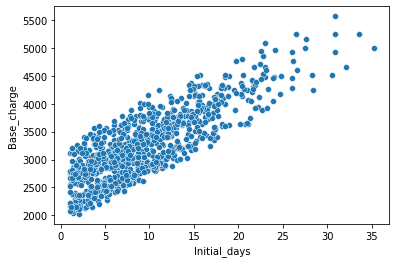

In [5]:
# seaborn
sns.scatterplot(data=df, x='Initial_days', y='Base_charge')

2a-Alternative) Make a [seaborn regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html) that shows the Base_charge vs. Initial_days. 
What advantage does the regplot have over the scatterplot, in terms of identifying relationships?

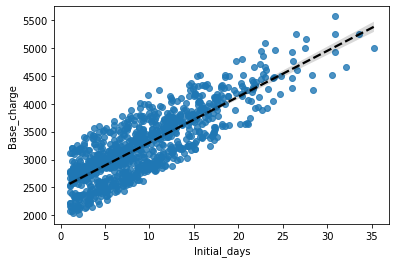

In [10]:
## the regplot adds a trendline that summarizes the relationship between X and Y
sns.regplot(data=df, x='Initial_days', y='Base_charge',
            line_kws={'color':'black','ls':'--'})

2b) Make a scatterplot that shows the Base_charge vs. Initial days that is color-coded based on the complication risk. 
What have you learned about complication risk, days and charge?

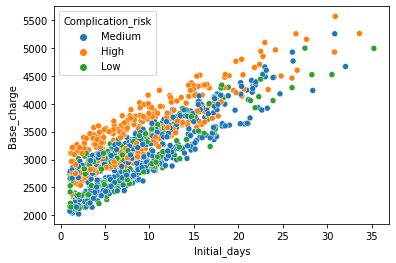

In [11]:
# seaborn scatterplot
sns.scatterplot(data=df, x='Initial_days', y='Base_charge',hue='Complication_risk')

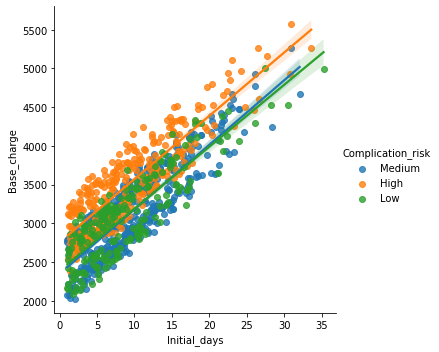

In [22]:
# seaborn lmplot - fancier version of regplot
sns.lmplot(data=df, x='Initial_days', y='Base_charge',hue='Complication_risk')

3) Make a barchart to show the average initial days for those with each level of complication risk. (hint: use groupby to groupby the Complication Risk and find the average of the initial days.) 

In [34]:
## for matplotlib - must calculate the average first
risk_days = df.groupby('Complication_risk')['Initial_days'].mean().reset_index(name = 'Avg_Days')
risk_days

,Complication_risk,Avg_Days
0,High,9.403992
1,Low,8.814701
2,Medium,9.464482


<BarContainer object of 3 artists>

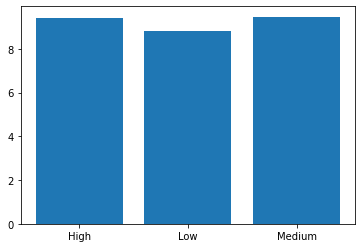

In [35]:
## then plot the calculated averages
plt.bar(risk_days['Complication_risk'], risk_days['Avg_Days'])

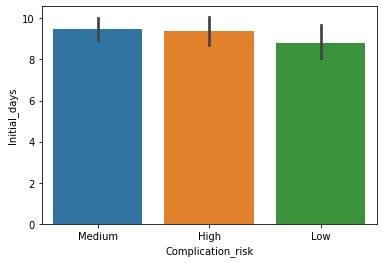

In [36]:
## seaborn
sns.barplot(data=df, x='Complication_risk',y='Initial_days')

4a) Create a filter to limit the dataset to only those who have high blood pressure (1 = yes, 0 = no).  

How many people have high blood pressure? (Hint: Find the length of your filter)


In [37]:
highblood = df[df['HighBlood']==1]
print(f'{len(highblood)} people have high blood pressure')

402 people have high blood pressure



4b) Now create a bar chart that shows the service received for only those who have high blood pressure.  

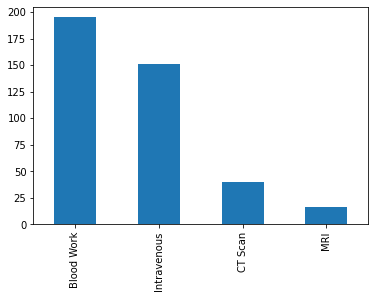

In [38]:
highbloodpressure = highblood['Services'].value_counts()
highbloodpressure.plot(kind = 'bar')

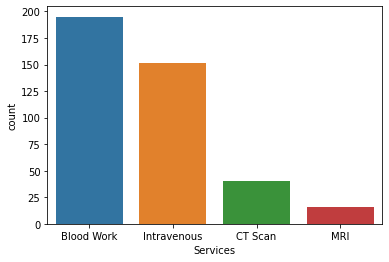

In [39]:
## seaborn - do both at once!
sns.countplot(data=highblood, x='Services')

5) Create a heatmap to show any potential correlations in this data

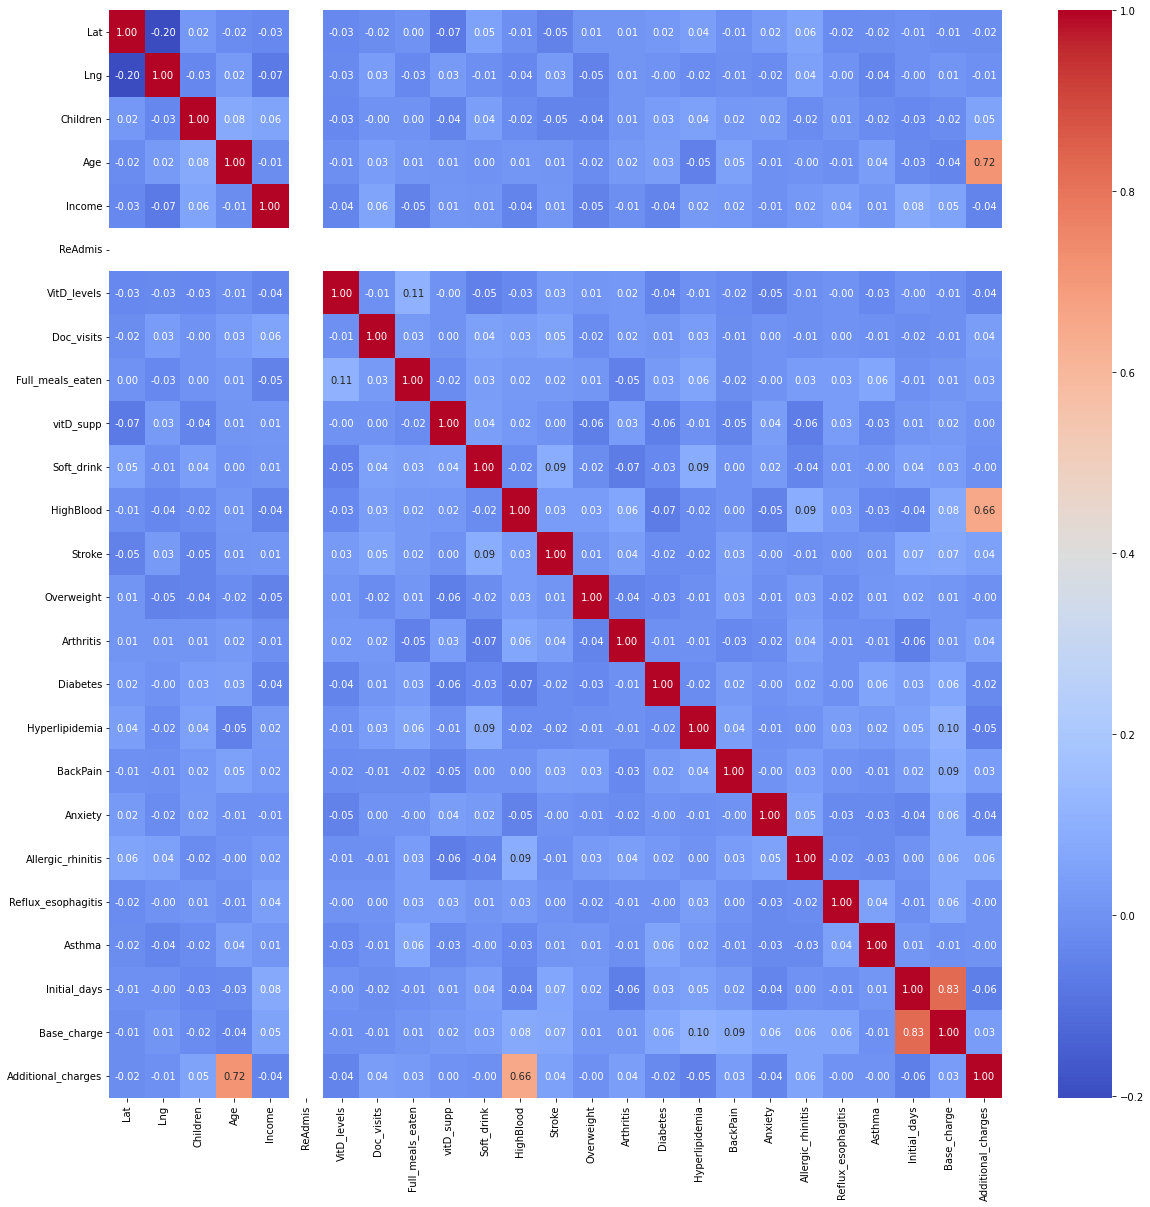

In [54]:
corr = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap = 'coolwarm',annot=True,fmt=".2f")

Looks like there are some correlations between Age and additional charges, highblood and additional charges and between initial days and base charge


6) Make multivariate boxplot graph to compare the distribution of income by gender.

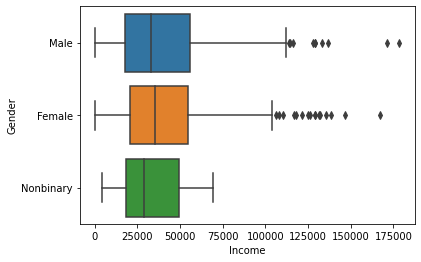

In [50]:
## seaborn 
sns.boxplot(data=df,x = 'Income', y = 'Gender');

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


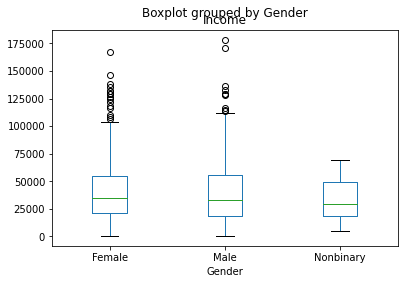

In [51]:
## pandas
df.boxplot(by='Gender', column = 'Income', grid = False)


If you have time, keep exploring!